In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [54]:
df = pd.read_csv("dvip_gp_cos2.csv")
df

,genf,dataset_name,vip_layers,bnn_structure,regression_coeffs,activation,dropout,split,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
0,BNN,boston,[1],[10],100,<built-in method tanh of type object at 0x7f01...,0.1,0,322.623505,3.724398,2.761556,2.005568,102.327393,4.572877,2.921531,2.140384
1,BNN,boston,[1],[10],100,<built-in method tanh of type object at 0x7fea...,0.1,1,300.393677,3.538779,2.705911,1.915166,142.593811,6.942177,3.646015,2.916698
2,BNN,boston,[1],[10],100,<built-in method tanh of type object at 0x7f2a...,0.1,10,322.568542,3.725716,2.762867,2.008728,99.874855,4.208319,2.853040,1.982640
3,BNN,boston,[1],[10],100,<built-in method tanh of type object at 0x7f4b...,0.1,11,337.457642,3.756577,2.769943,2.013014,96.827202,3.806052,2.779008,2.092379
4,BNN,boston,[1],[10],100,<built-in method tanh of type object at 0x7fc8...,0.1,12,328.688171,3.736767,2.762781,1.977590,104.727905,4.721308,2.949374,2.360252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,cos,winered,[4],"[10, 10]",300,tanh,0.1,19,1443.676392,0.229190,0.098304,0.135892,1268.674072,0.686162,1.306761,0.348477
1424,cos,winered,[4],"[10, 10]",300,tanh,0.1,3,1529.481567,0.267842,0.230112,0.157670,1140.517334,0.734018,1.330655,0.394141
1425,cos,winered,[4],"[10, 10]",300,tanh,0.1,5,1529.552124,0.298215,0.310321,0.173311,942.848267,0.666370,1.177988,0.364963
1426,cos,winered,[4],"[10, 10]",300,tanh,0.1,6,1524.063721,0.272871,0.236692,0.159633,1143.021484,0.748085,1.367511,0.396469


Group table by their common parameters and compute mean and std over split

In [55]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name", "genf", "dropout", "regression_coeffs", "vip_layers"]).agg(["mean", std])
full_df


split            \
                                                             mean       std   
dataset_name genf dropout regression_coeffs vip_layers                        
boston       BNN  0.0     20                [1]          9.500000  1.289380   
                                            [2]          9.500000  1.289380   
                                            [3]          9.500000  1.289380   
                                            [4]          9.500000  1.289380   
                          50                [1]          9.500000  1.289380   
...                                                           ...       ...   
energy       cos  0.1     300               [4]          9.789474  1.324349   
winered      cos  0.1     300               [1]          9.500000  1.289380   
                                            [2]         11.333333  1.381357   
                                            [3]          8.333333  1.465656   
                                            [4]          9.833333  1.928706   

                                                         LOSS_train  \
                                                               mean   
dataset_name genf dropout regression_coeffs vip_layers                
boston       BNN  0.0     20                [1]          325.246240   
                                            [2]          376.997032   
                                            [3]          337.792139   
                                            [4]          358.451968   
                          50                [1]          278.854917   
...                                                             ...   
energy       cos  0.1     300               [4]         -380.102706   
winered      cos  0.1     300               [1]         1703.726874   
                                            [2]         1706.892635   
                                            [3]         1716.789119   
                                            [4]         1479.704447   

                                                                  RMSE_train  \
                                                              std       mean   
dataset_name genf dropout regression_coeffs vip_layers                         
boston       BNN  0.0     20                [1]          3.049666   4.009118   
                                            [2]          4.252282   2.187194   
                                            [3]          3.680914   2.552561   
                                            [4]          4.788569   2.579737   
                          50                [1]          3.824851   3.263872   
...                                                           ...        ...   
energy       cos  0.1     300               [4]          4.567995   0.261343   
winered      cos  0.1     300               [1]          1.335777   0.586294   
                                            [2]          1.473992   0.580400   
                                            [3]          2.285060   0.597447   
                                            [4]         17.695716   0.265349   

                                                                 NLL_train  \
                                                             std      mean   
dataset_name genf dropout regression_coeffs vip_layers                       
boston       BNN  0.0     20                [1]         0.029655  2.803479   
                                            [2]         0.029656  2.298981   
                                            [3]         0.022001  2.401102   
                                            [4]         0.030064  2.412118   
                          50                [1]         0.029326  2.598973   
...                                                          ...       ...   
energy       cos  0.1     300               [4]         0.001977  0.264889   
winered      cos  0.1     300               [1]         0

In [56]:
full_df.query("genf == 'BNN'")

split           \
                                                        mean      std   
dataset_name genf dropout regression_coeffs vip_layers                  
boston       BNN  0.0     20                [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
                                            [4]          9.5  1.28938   
                          50                [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
                                            [4]          9.5  1.28938   
                          100               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
                  0.1     100               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
                                            [4]          9.5  1.28938   
                          200               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
                                            [4]          9.5  1.28938   
concrete     BNN  0.0     100               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
energy       BNN  0.0     100               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   

                                                        LOSS_train            \
                                                              mean       std   
dataset_name genf dropout regression_coeffs vip_layers                         
boston       BNN  0.0     20                [1]         325.246240  3.049666   
                                            [2]         376.997032  4.252282   
                                            [3]         337.792139  3.680914   
                                            [4]         358.451968  4.788569   
                          50                [1]         278.854917  3.824851   
                                            [2]         358.055139  3.542263   
                                            [3]         311.842015  6.301790   
                                            [4]         333.179271  4.354899   
                          100               [1]         222.670411  2.839749   
                                            [2]         342.510669  3.139956   
                                            [3]         263.134091  3.982257   
                  0.1     100               [1]         326.141226  2.281974   
                                            [2]         324.903142  2.996524   
                                            [3]         304.608763  3.109218   
                                            [4]         300.146235  6.676829   
                          200               [1]         324.062679  2.552857   
                                            [2]         328.351181  3.857221   
                                            [3]         235.068985  2.422546   
                                            [4]         222.316760  4.951893   
concrete     BNN  0.0     100               [1]         508.686186  2.366205   
                                            [2]         551.864175  3.146927   
                                            [3]         294.844854  5.990909   
energy    

# Comparative with other models

In [57]:
query = "genf == 'BNN' and regression_coeffs == 100 and dropout == 0.1"
vip = full_df.query(query)
#vip =  full_df.query("prior_kl == True and bnn_structure == '[10]'")
vip


split           \
                                                        mean      std   
dataset_name genf dropout regression_coeffs vip_layers                  
boston       BNN  0.0     100               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
concrete     BNN  0.0     100               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   
energy       BNN  0.0     100               [1]          9.5  1.28938   
                                            [2]          9.5  1.28938   
                                            [3]          9.5  1.28938   

                                                        LOSS_train            \
                                                              mean       std   
dataset_name genf dropout regression_coeffs vip_layers                         
boston       BNN  0.0     100               [1]         222.670411  2.839749   
                                            [2]         342.510669  3.139956   
                                            [3]         263.134091  3.982257   
concrete     BNN  0.0     100               [1]         508.686186  2.366205   
                                            [2]         551.864175  3.146927   
                                            [3]         294.844854  5.990909   
energy       BNN  0.0     100               [1]         -95.807656  2.682823   
                                            [2]        -581.041772  4.794381   
                                            [3]        -652.781750  4.307452   

                                                       RMSE_train            \
                                                             mean       std   
dataset_name genf dropout regression_coeffs vip_layers                        
boston       BNN  0.0     100               [1]          2.573128  0.015686   
                                            [2]          2.659367  0.030723   
                                            [3]          1.867184  0.024898   
concrete     BNN  0.0     100               [1]          5.670237  0.014060   
                                            [2]          4.054865  0.023793   
                                            [3]          3.081763  0.022294   
energy       BNN  0.0     100               [1]          1.540860  0.007245   
                                            [2]          0.399805  0.002332   
                                            [3]          0.344846  0.001571   

                                                       NLL_train            \
                                                            mean       std   
dataset_name genf dropout regression_coeffs vip_layers                       
boston       BNN  0.0     100               [1]         2.380037  0.006183   
                                            [2]         2.453497  0.008695   
                                            [3]         2.109903  0.010927   
concrete     BNN  0.0     100               [1]         3.154836  0.002466   
                                            [2]         2.882055  0.004921   
                                            [3]         2.582727  0.007012   
energy       BNN  0.0     100               [1]         1.866560  0.004657   
                                            [2]         0.619849  0.004438   
                                            [3]         0.486268  0.004294   

                                                       CRPS_train            \
                                                             mean       std   
dataset_name genf dropout regression_coeffs vip_layers                        
boston       BNN  0.0     100               [1]          1.398330  0.007687   
               

In [58]:
doubly = pd.read_csv("doubly.csv")
doubly.query("split == 0 and layers == 1")

,split,layers,dataset,NLL,RMSE,CRPS
18,0,1,boston,2.729527,3.863804,1.916543
108,0,1,kin8nm,-1.005328,0.081880,0.046887
231,0,1,power,2.840120,4.134205,2.153474
376,0,1,naval,-6.865809,0.000153,0.000113
506,0,1,wine_red,0.940418,0.636108,0.340174
561,0,1,protein,2.898946,4.391515,2.457563
577,0,1,concrete,3.079898,5.233841,2.944245
733,0,1,energy,1.080020,0.640521,0.379140


In [59]:
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std]).drop("split", axis = 1)
doubly

NLL                RMSE                CRPS          
                     mean       std      mean       std      mean       std
dataset  layers                                                            
boston   1       2.621324  0.061539  3.461930  0.172243  1.778254  0.054756
         2       2.619427  0.060715  3.464310  0.174090  1.775397  0.055053
         3       2.618580  0.057986  3.477714  0.176407  1.780114  0.056023
         4       2.612612  0.056778  3.459250  0.180476  1.768086  0.057338
         5       2.619665  0.058376  3.483772  0.184585  1.778915  0.059403
concrete 1       3.134538  0.016871  5.699006  0.128251  3.104325  0.057626
         2       3.137992  0.016458  5.709117  0.127669  3.113382  0.057095
         3       3.142599  0.016832  5.724927  0.129163  3.125693  0.058891
         4       3.134859  0.017792  5.658314  0.130668  3.083788  0.057433
         5       3.092611  0.015842  5.374571  0.115534  2.942421  0.051177
energy   1       1.141213  0.016797  0.713296  0.020260  0.414601  0.009610
         2       0.661802  0.019321  0.451084  0.012712  0.252025  0.005593
         3       0.711009  0.021007  0.462688  0.013160  0.262231  0.005888
         4       0.759983  0.021207  0.478973  0.014059  0.273281  0.006523
         5       0.700959  0.021684  0.458096  0.015404  0.259230  0.007059
kin8nm   1      -0.975375  0.003277  0.086898  0.000536  0.049229  0.000258
         2      -1.350378  0.004308  0.062584  0.000347  0.035030  0.000162
         3      -1.382660  0.006671  0.060735  0.000458  0.033985  0.000235
naval    1      -6.475724  0.117892  0.000285  0.000035  0.000185  0.000020
         2      -6.894672  0.101289  0.000152  0.000036  0.000119  0.000017
         3      -7.039468  0.049660  0.000085  0.000012  0.000091  0.000006
         4      -6.959729  0.055067  0.000109  0.000016  0.000102  0.000007
         5      -6.873125  0.072354  0.000159  0.000025  0.000120  0.000010
power    1       2.806324  0.009995  3.993163  0.040720  2.173505  0.011311
         2       2.770222  0.009873  3.850422  0.038183  2.075122  0.009159
         3       2.747370  0.012654  3.760601  0.049078  2.023911  0.015586
         4       2.732378  0.011725  3.702821  0.045233  1.984471  0.012649
         5       2.735273  0.010918  3.712386  0.041823  1.991525  0.009105
protein  1       2.907479  0.002265  4.428554  0.011083  2.481267  0.005884
         2       2.786240  0.002311  3.936413  0.010322  2.161253  0.004967
         3       2.715014  0.002847  3.708458  0.011970  2.002001  0.005932
         4       2.689973  0.002877  3.641484  0.011498  1.950791  0.005703
         5       2.692614  0.004289  3.663181  0.016545  1.957200  0.008180
wine_red 1       0.928739  0.012829  0.614669  0.008504  0.340628  0.004178
         2       0.928976  0.012711  0.614753  0.008461  0.340674  0.004151
         3       0.929331  0.012509  0.615001  0.008325  0.340852  0.004091
         4       0.929474  0.012561  0.614968  0.008397  0.340988  0.004120
         5       0.929893  0.012395  0.615139  0.008317  0.341113  0.004076

In [60]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and meake them invisible
    far = means - mean > 2*std
    far[0] = False
    means[far] = np.mean(means[~far])
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    if far.any() != 0:
        x_min, x_max = ax.get_xlim()
        slope = (x_max - x_min)/5
        ax.arrow(x = x_max - slope, y = np.array(model_names)[far][0], 
                 dx = slope, dy =0, color = np.array(colors)[far][0],
                 width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    #vip100_query = vip100.query("dataset_name == @dataset").xs((metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()
    
    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {"VIP": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          #"VIP 100": item(vip100_query.query("vip_layers == '[1]'").to_numpy()),
          "DGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout(pad=3.0) # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize())
        axis.locator_params(axis="x", nbins=4)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
        Circle.Patch(color='orchid', label='Bayesian NN'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles)
        
    plt.savefig("../plots/" + metric + ("_train" if train_metrics else "") + "_" +query + ".pdf")
        

In [61]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = ["VIP", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5", "DGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {"VIP": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          #"VIP 100": "darkblue", 
          "DGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

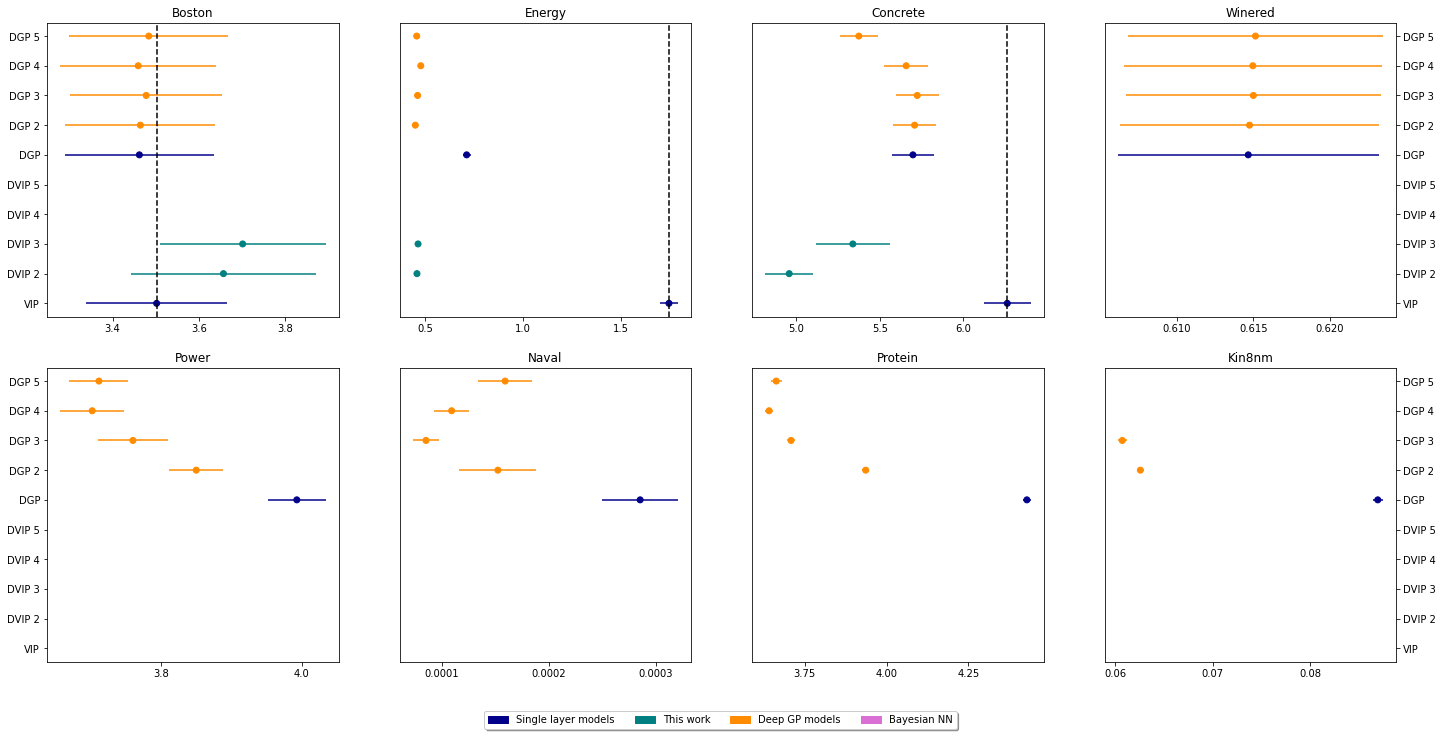

In [62]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

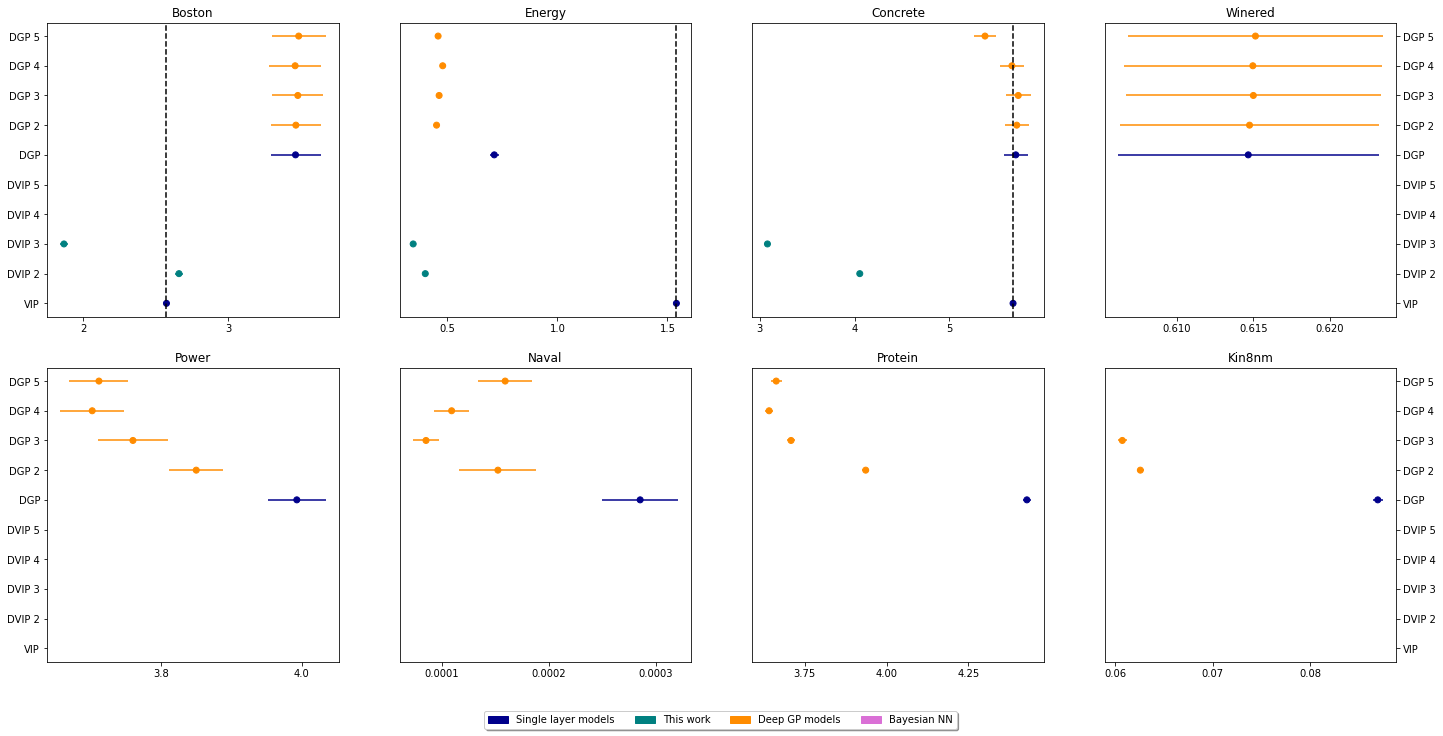

In [63]:
plot_datasets(dataset_names, model_names, colors, "RMSE", train_metrics = True)

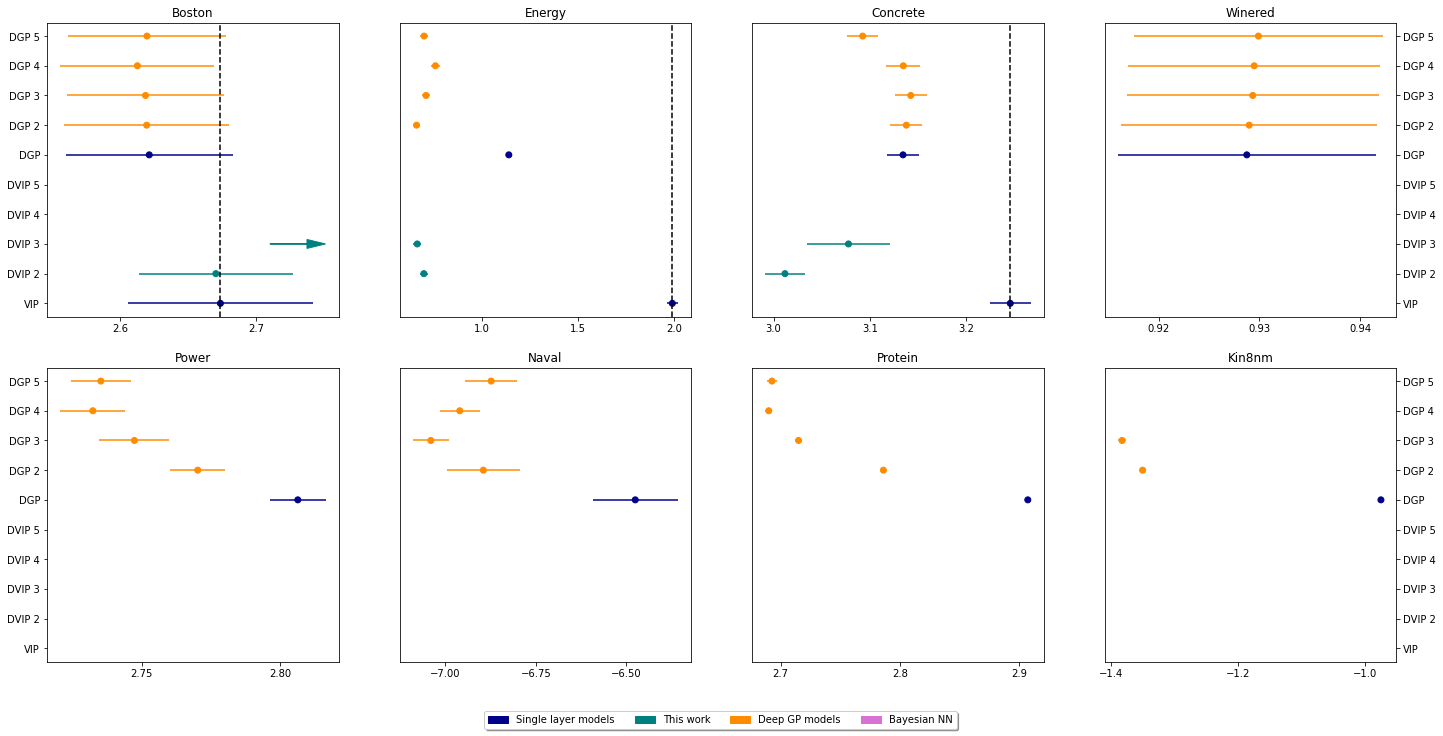

In [64]:
plot_datasets(dataset_names, model_names, colors, "NLL")

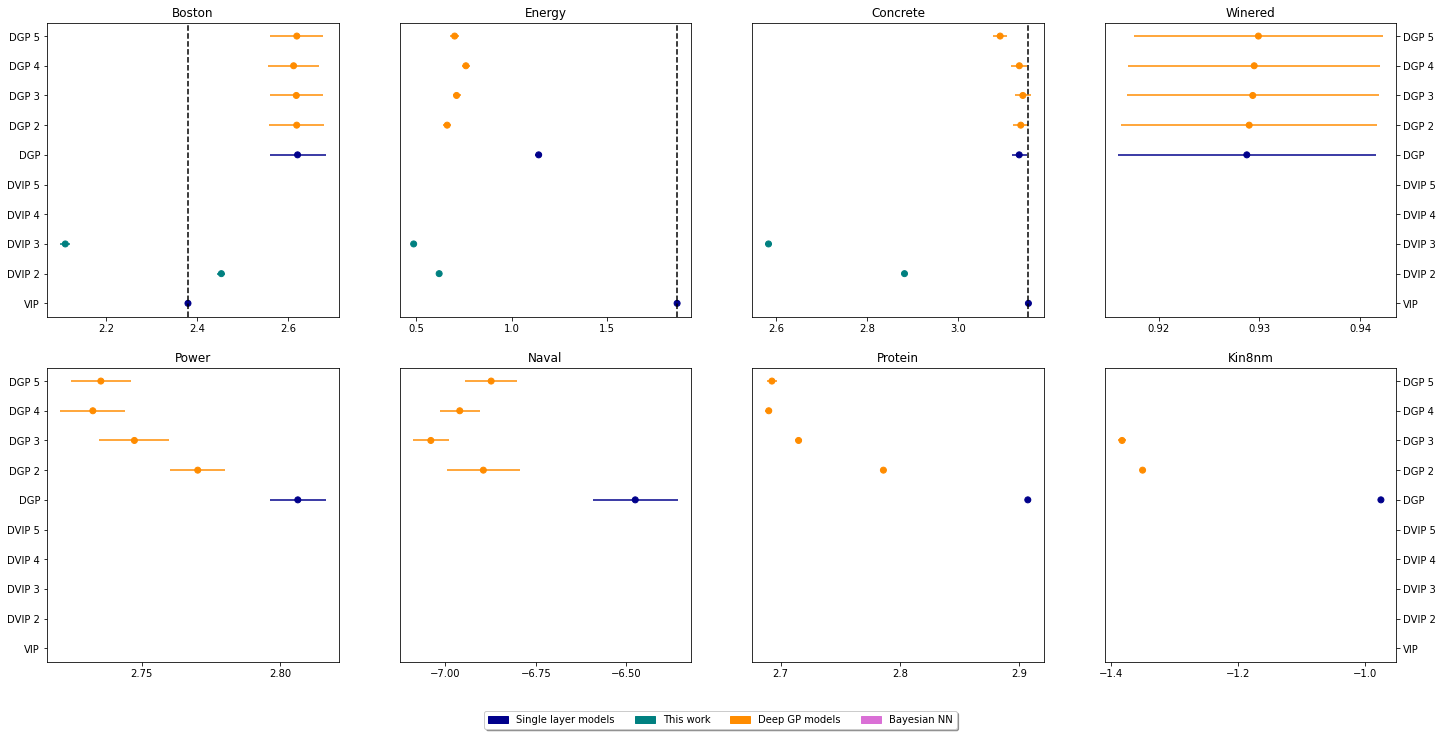

In [65]:
plot_datasets(dataset_names, model_names, colors, "NLL", train_metrics = True)

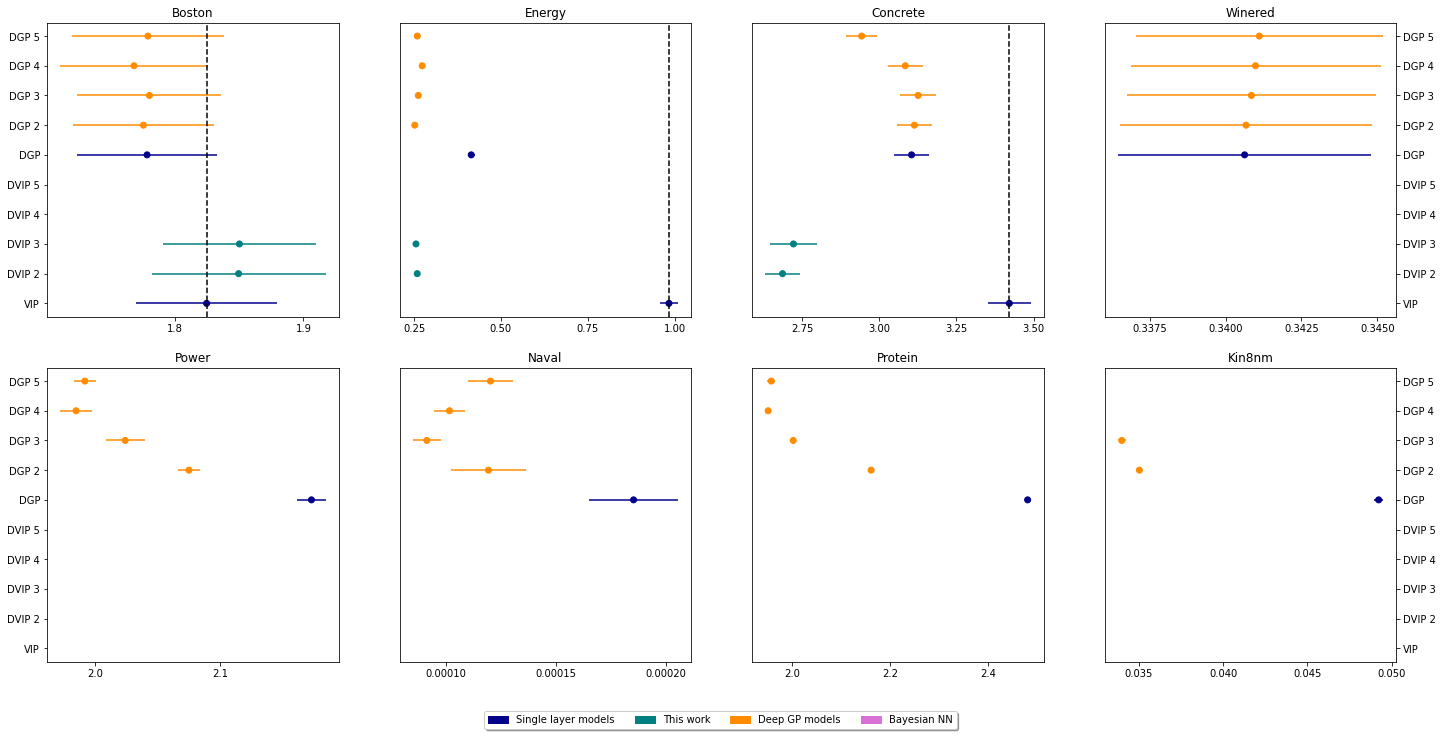

In [66]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

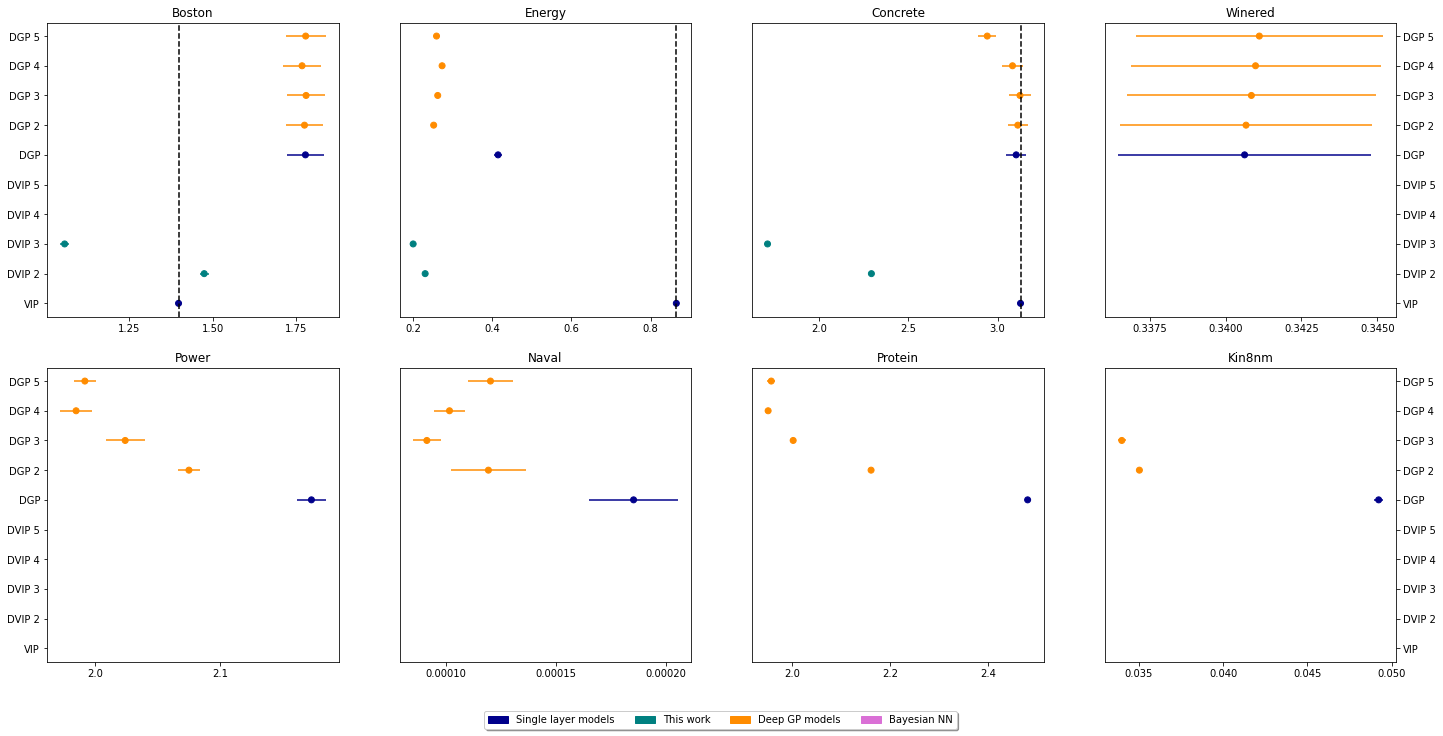

In [67]:
plot_datasets(dataset_names, model_names, colors, "CRPS", train_metrics = True)